In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.metrics import cohen_kappa_score, r2_score
from wearsed.training.metric_info import get_ahis, combine_fold_results

In [2]:
def get_ahi_severity_class(ahi):
    if ahi < 5:   # Normal
        return 0
    if ahi < 15:  # Mild
        return 1
    if ahi < 30:  # Moderate
        return 2
    return 3      # Severe

def get_ahi_severity_class_NBL(ahi):
    if ahi < 5 and ahi >= 2.4:
        return 1  # Mild
    if ahi > 5 and ahi < 7:
        return 0  # Normal
    if ahi < 15 and ahi >= 12.4:
        return 2  # Moderate
    if ahi > 15 and ahi < 17.4:
        return 1  # Mild
    if ahi < 30 and ahi >= 26.6:
        return 3  # Severe
    if ahi > 30 and ahi < 35.2:
        return 2  # Moderate
    return -1     # No NBL

In [3]:
run, folds, epoch = 'final_info', [0, 1, 2, 3], 28
thr = 0.25

tst_df = pd.read_csv('59_tsts.csv')

print('### Loading Results...')
y_pred, y_true, hypnogram_data, class_data = combine_fold_results(run, folds, epoch, drop_sep=False)

print('### Calculating AHIs')
ahis_pred, ahis_true = get_ahis(y_pred, y_true, hypnogram_data, class_data, thr, correctify=True, correctify_size=3, tsts=tst_df['tst_true'].values)


### Loading Results...
### Calculating AHIs


In [18]:
pd.DataFrame({
    'mesa_id': tst_df['mesa_id'].values,
    'ahi_pred': ahis_pred,
    'ahi_true': ahis_true,
}).to_csv('63_ahis.csv')

In [16]:
from wearsed.dataset.Recording import Recording
r1 = Recording(subject_id=5148, events_as_list=True)
r1.get_ahi()

45.522041763341065

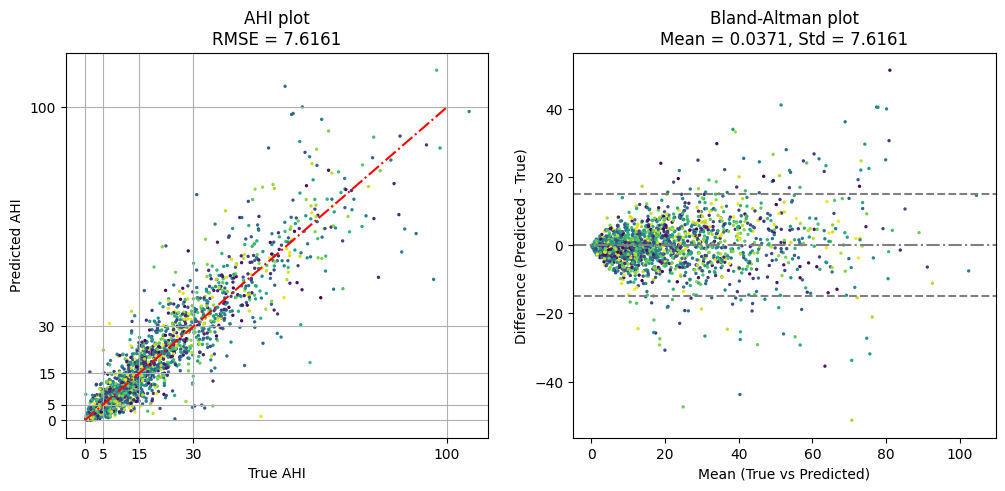

In [7]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(ahis_true, ahis_pred, s=2, c=np.random.rand(len(ahis_true), 1))
ax1.plot([0, 100], [0, 100], 'r-.')
ax1.set_title(f'AHI plot\nRMSE = {np.sqrt(((np.array(ahis_pred) - np.array(ahis_true)) ** 2).mean()):.4f}')
ax1.set_xlabel('True AHI')
ax1.set_ylabel('Predicted AHI')
ax1.set_xticks([0, 5, 15, 30, 100])
ax1.set_yticks([0, 5, 15, 30, 100])
ax1.grid()

mean = np.mean([ahis_pred, ahis_true], axis=0)
diff = np.array(ahis_pred) - np.array(ahis_true)
diff_mean, diff_std = np.mean(diff), np.std(diff, axis=0)
ax2.scatter(mean, diff, s=2, c=np.random.rand(len(ahis_true), 1))
ax2.axhline(diff_mean,                 color='gray', linestyle='-.')
ax2.axhline(diff_mean + 1.96*diff_std, color='gray', linestyle='--')
ax2.axhline(diff_mean - 1.96*diff_std, color='gray', linestyle='--')
ax2.set_title(f'Bland-Altman plot\nMean = {diff_mean:.4f}, Std = {diff_std:.4f}')
ax2.set_xlabel('Mean (True vs Predicted)')
ax2.set_ylabel('Difference (Predicted - True)')

plt.show()

In [21]:
ahis = pd.read_csv('63_ahis.csv', index_col=0)

In [ ]:
ahis['mesa_id']

0       6783
1       5148
2       4157
3        856
4       5224
        ... 
1875    1892
1876     368
1877    1612
1878    3777
1879    2780
Name: mesa_id, Length: 1880, dtype: int64

In [25]:
ahis['mesa_id'][1879]

np.int64(2780)

In [27]:
with open('../wearsed/dataset/data_ids/' + 'mesa_root.txt', 'r') as f:
    mesa_root = f.readline()

subject_infos = pd.read_csv(mesa_root + 'datasets/mesa-sleep-harmonized-dataset-0.7.0.csv')
subject_infos.set_index('mesaid', inplace=True)

In [28]:
subject_infos

,examnumber,nsrr_age,nsrr_bmi,nsrr_age_gt89,nsrr_sex,nsrr_race,nsrr_current_smoker,nsrr_ever_smoker,nsrr_ahi_hp3u,nsrr_ahi_hp3r_aasm15,...,nsrr_ttlmefsp_f1,nsrr_ttllatsp_f1,nsrr_ttlprdsp_s1sr,nsrr_ttldursp_s1sr,nsrr_waso_f1,nsrr_pctdursp_s1,nsrr_pctdursp_s2,nsrr_pctdursp_s3,nsrr_pctdursp_sr,nsrr_tib_f1
mesaid,,,,,,,,,,,,,,,,,,,,,
1,5,70.0,22.01,no,female,white,no,yes,18.14,27.56,...,62.66,26.0,124.0,67.0,205.5,19.70,66.2,2.77,11.4,575.0
2,5,83.0,21.90,no,female,white,not reported,no,8.34,10.75,...,86.37,NaN,67.0,54.0,59.0,6.55,48.4,20.90,24.2,433.0
6,5,57.0,56.01,no,female,hispanic,no,yes,62.51,67.21,...,72.03,NaN,78.0,21.0,139.0,19.70,53.1,10.50,16.6,497.0
10,5,57.0,19.84,no,male,white,not reported,no,40.91,48.00,...,55.28,NaN,0.0,0.0,89.0,9.13,57.5,33.30,0.0,199.0
12,5,80.0,27.77,no,male,white,not reported,no,27.47,33.63,...,47.81,12.0,416.0,138.0,298.0,15.60,69.0,2.94,12.5,583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,5,77.0,24.32,no,female,black or african american,not reported,no,34.02,35.77,...,92.10,14.0,84.0,78.0,41.5,18.40,60.9,1.47,19.2,533.0
6807,5,60.0,28.32,no,male,hispanic,no,yes,48.24,49.60,...,79.28,NaN,192.0,148.0,103.5,22.40,60.6,4.27,12.8,502.0
6810,5,77.0,30.47,no,male,hispanic,no,yes,25.84,30.44,...,67.53,NaN,79.0,51.0,163.0,21.70,57.6,0.00,20.7,502.0


In [31]:
subject_infos.loc[6]

examnumber                         5
nsrr_age                        57.0
nsrr_bmi                       56.01
nsrr_age_gt89                     no
nsrr_sex                      female
nsrr_race                   hispanic
nsrr_current_smoker               no
nsrr_ever_smoker                 yes
nsrr_ahi_hp3u                  62.51
nsrr_ahi_hp3r_aasm15           67.21
nsrr_ahi_hp4u_aasm15           51.12
nsrr_ahi_hp4r                  58.32
nsrr_tst_f1                    358.0
nsrr_phrnumar_f1               21.79
nsrr_flag_spsw          full scoring
nsrr_ttleffsp_f1               72.03
nsrr_ttlmefsp_f1               72.03
nsrr_ttllatsp_f1                 NaN
nsrr_ttlprdsp_s1sr              78.0
nsrr_ttldursp_s1sr              21.0
nsrr_waso_f1                   139.0
nsrr_pctdursp_s1                19.7
nsrr_pctdursp_s2                53.1
nsrr_pctdursp_s3                10.5
nsrr_pctdursp_sr                16.6
nsrr_tib_f1                    497.0
Name: 6, dtype: object

In [2]:
from wearsed.dataset.AHICorrectionDataset import AHICorrectionDataset

In [3]:
ds = AHICorrectionDataset(mesaid_path='../wearsed/dataset/data_ids/', ahis_path='63_ahis.csv')

In [6]:
ds[1]

((np.float64(16.314199395770395),
  np.float64(70.0),
  np.float64(22.01),
  0,
  -1,
  1),
 np.float64(18.48998459167951))

In [45]:
x, y = [], []
for i in range(4):
    x.append(ds[i][0])
    y.append(ds[i][1])

In [46]:
x

[(np.float64(11.86046511627907), np.float64(85.0), np.float64(20.0), 0, 0, -1),
 (np.float64(39.55390334572491),
  np.float64(84.0),
  np.float64(24.55),
  1,
  0,
  -1),
 (np.float64(16.34961439588689),
  np.float64(67.0),
  np.float64(20.36),
  0,
  0,
  -1),
 (np.float64(11.48936170212766),
  np.float64(63.0),
  np.float64(27.32),
  1,
  -1,
  1)]

In [47]:
y

[np.float64(12.589285714285714),
 np.float64(43.15545243619489),
 np.float64(20.81896551724138),
 np.float64(10.757341576506954)]

In [48]:
np.array(y)

array([12.58928571, 43.15545244, 20.81896552, 10.75734158])

In [52]:
np.array(x)

array([[11.86046512, 85.        , 20.        ,  0.        ,  0.        ,
        -1.        ],
       [39.55390335, 84.        , 24.55      ,  1.        ,  0.        ,
        -1.        ],
       [16.3496144 , 67.        , 20.36      ,  0.        ,  0.        ,
        -1.        ],
       [11.4893617 , 63.        , 27.32      ,  1.        , -1.        ,
         1.        ]])

In [11]:
def get_batch(full_dataset, ids, i, batch_size):
    ids = ids[i*batch_size:i*batch_size+batch_size]
    x, y = [full_dataset[mesa_id][0] for mesa_id in ids], [full_dataset[mesa_id][1] for mesa_id in ids]
    x, y = np.array(x), np.array(y)
    return x, y

In [9]:
from wearsed.training.kfold.load_kfold import get_fold
FOLD_NAME = 'fold-4-somnolyzer'
SEED = 42
train_ids, test_ids = get_fold(FOLD_NAME, 0, seed=SEED, path='../wearsed/training/kfold/')

In [12]:
x, y = get_batch(ds, train_ids, 0, 64)

In [13]:
y

array([11.89655172, 26.35182999, 37.7389517 , 11.31210191, 23.47540984,
       12.23744292,  5.58139535,  1.97014925, 46.70838548,  4.32055749,
        7.07732634,  8.40413318, 27.97546012, 27.04545455,  5.1       ,
       18.11320755, 12.72727273, 11.98098257, 28.45360825, 12.48868778,
       14.07554672, 16.7611336 , 13.72299873,  3.88888889, 33.16582915,
       15.80705009, 61.04046243, 22.5       ,  5.376     , 12.70588235,
        7.03703704, 33.8       , 26.1452514 , 32.37804878,  2.88164666,
       22.39316239, 26.47985989, 10.31476998,  8.81889764,  3.87096774,
       38.37563452, 42.26415094, 22.74314214,  8.16120907, 57.91666667,
        6.37873754,  0.38647343, 41.15183246, 23.75545852, 11.94401244,
       30.88235294, 22.7700831 , 17.66037736,  9.48655257,  3.14136126,
       21.77985948, 18.30882353, 28.9217759 , 25.07713885, 18.56733524,
       12.72483221,  3.49939247, 33.75483871, 47.96812749])

In [14]:
test_ids

[6783,
 5148,
 4157,
 856,
 5224,
 4928,
 4284,
 5396,
 2735,
 5292,
 4682,
 4535,
 4087,
 465,
 2193,
 1026,
 5921,
 483,
 1087,
 6435,
 5837,
 1772,
 2851,
 4650,
 5243,
 6156,
 6641,
 3516,
 792,
 490,
 1164,
 275,
 2377,
 6656,
 1640,
 2519,
 6401,
 6582,
 4432,
 4461,
 1148,
 5079,
 3140,
 2738,
 3216,
 6280,
 5464,
 382,
 1691,
 5362,
 6050,
 4420,
 3336,
 3224,
 902,
 155,
 3539,
 3173,
 4527,
 764,
 6313,
 4436,
 5431,
 639,
 3259,
 744,
 4055,
 2830,
 2961,
 1381,
 6157,
 416,
 651,
 6075,
 2463,
 5009,
 523,
 2368,
 939,
 6340,
 2169,
 4163,
 6217,
 4437,
 2325,
 4178,
 4379,
 1531,
 1389,
 2003,
 3736,
 1301,
 2276,
 536,
 2455,
 6755,
 1209,
 2906,
 3734,
 6417,
 6751,
 3914,
 2590,
 4592,
 3666,
 3556,
 2035,
 3375,
 3917,
 4731,
 5047,
 4319,
 1879,
 4734,
 5276,
 5108,
 6786,
 347,
 1589,
 5932,
 1957,
 5955,
 5622,
 5897,
 2123,
 863,
 6757,
 1680,
 4241,
 3855,
 3479,
 1927,
 4497,
 3980,
 4158,
 292,
 1446,
 3011,
 914,
 2109,
 813,
 640,
 2904,
 771,
 5219,
 2297,
 4